In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
data = pd.read_csv("C:/Users/dirty/OneDrive/Desktop/diamonds.csv")

In [21]:
print(data.head())
print(data.info())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940

In [51]:
target = "price"
X = data.drop(columns=[target])
y = data[target]

In [52]:
features = [col for col in data.columns if col != target]

In [28]:
X = data[features]
y = data[target]
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [29]:
print("\nFeatures used:", features)
print("Target column:", target)


Features used: ['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
Target column: price


In [44]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

In [ ]:
lr_model = LinearRegression()
svm_model = SVR()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
lr_model.fit(X_train, y_train)
svm_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print("MAE: ", mean_absolute_error(y_true, y_pred))
    print("MSE: ", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²:  ", r2_score(y_true, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")
evaluate_model(y_test, y_pred_rf, "Random Forest")

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

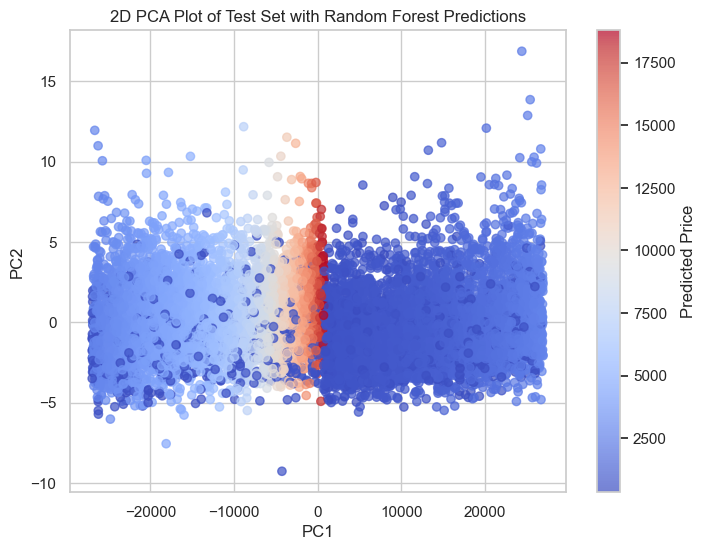

In [103]:
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred_rf, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Predicted Price')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Plot of Test Set with Random Forest Predictions')
plt.show()

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [109]:
results_data = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'SVM': y_pred_svm,
    'Random Forest': y_pred_rf
})

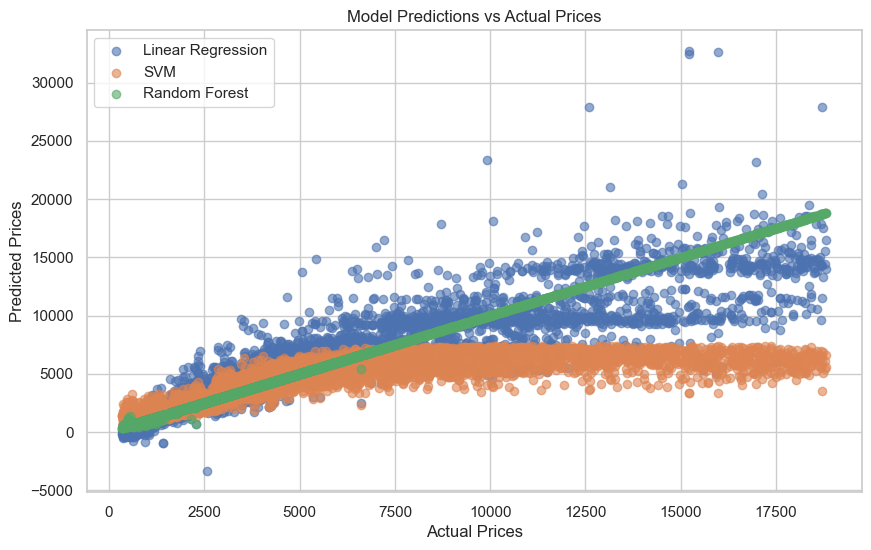

In [110]:
plt.figure(figsize=(10,6))
plt.scatter(results_data['Actual'], results_data['Linear Regression'], alpha=0.6, label='Linear Regression')
plt.scatter(results_data['Actual'], results_data['SVM'], alpha=0.6, label='SVM')
plt.scatter(results_data['Actual'], results_data['Random Forest'], alpha=0.6, label='Random Forest')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Model Predictions vs Actual Prices')
plt.legend()
plt.show()